In [26]:
from glio.imports import *
from torchzero.random.random import uniform, Uniform

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


point = tensor([9.3309, 4.0984])


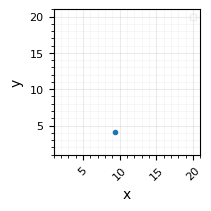

In [35]:
domain = torch.tensor([1, 21])
domain_length = domain[1] - domain[0]
domain_length_from_0 = domain_length/2
sampler = Uniform(-domain_length_from_0, domain_length_from_0)
point = sampler(2)

print(f'{point = }')

fig = Figure()
fig.add().point(*point).style_chart(xlim = (*domain,), ylim = (*domain,)) # type:ignore
fig.show(figsize = (2,2))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


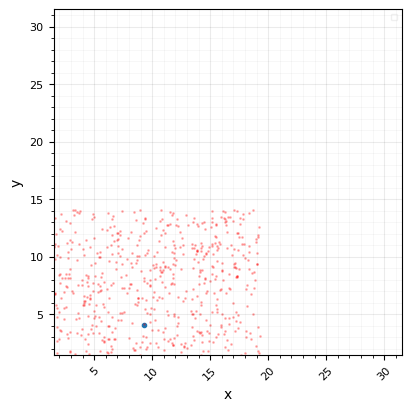

In [80]:
shrink = 1
petrubations = [sampler(2) * shrink for _ in range(1000)]

fig = Figure()
(
fig
.add()
.point(*point) # type:ignore
.scatter([point + p for p in petrubations], color='red', alpha=0.25, s=1)
.style_chart(xlim = (*(domain*1.5),), ylim = (*(domain*1.5),))
)
fig.show(figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


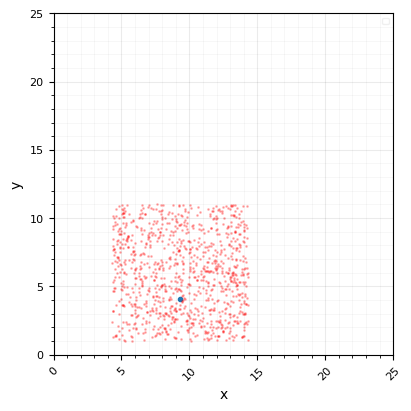

point = tensor([9.3309, 4.0984])
domain = tensor([ 1, 21])
random range = [-10.0, 10.0]
domain_min = tensor([ 4.3309, -0.9016])
domain_max = tensor([14.3309,  9.0984])
domain_min_overflow = tensor([0.0000, 1.9016])
domain_max_overflow = tensor([0., 0.])


In [86]:
shrink = 0.5
domain_min = point - domain_length_from_0 * shrink
domain_max = point + domain_length_from_0 * shrink

domain_min_overflow = (domain[0] - domain_min).clamp_min(0)
domain_max_overflow = (domain_max - domain[1]).clamp_min(0)

petrubations = [sampler(2) * shrink for _ in range(1000)]

fig = Figure()
(
fig
.add()
.point(*point) # type:ignore
.scatter([point + p + domain_min_overflow - domain_max_overflow for p in petrubations], color='red', alpha=0.25, s=1)
.style_chart(xlim = (0, 25), ylim = (0, 25))
)
fig.show(figsize = (4,4))

print(f'{point = }')
print(f'{domain = }')
print(f'random range = [-{domain_length_from_0}, {domain_length_from_0}]')
print(f'{domain_min = }')
print(f'{domain_max = }')
print(f'{domain_min_overflow = }')
print(f'{domain_max_overflow = }')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


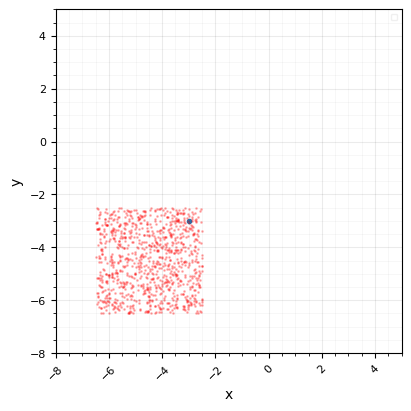

point = tensor([-3., -3.])
domain = tensor([ 1, 21])
random range = [-10.0, 10.0]
domain_min = tensor([ 4.3309, -0.9016])
domain_max = tensor([14.3309,  9.0984])
domain_min_overflow = tensor([0.0000, 1.9016])
domain_max_overflow = tensor([0., 0.])


In [111]:
def uniform_around_in_domain(point:torch.Tensor, around: float, domain:torch.Tensor | Sequence[float], sampler=uniform):
    low, high = domain

    min_overflow = (low - (point - around)).clamp_min(0)
    max_overflow = (high - (point + around)).clamp_max(0)

    return point + sampler(point.shape, -around, around,device=point.device, dtype=point.dtype, requires_grad=point.requires_grad)\
        + min_overflow + max_overflow

fig = Figure()
point = torch.tensor([-3., -3.])
(
fig
.add()
.point(*point) # type:ignore
.scatter([uniform_around_in_domain(point, 2, [-7, -2.5]) for _ in range(1000)], color='red', alpha=0.25, s=1)
.style_chart(xlim = (-8, 5), ylim = (-8, 5))
)
fig.show(figsize = (4,4))

print(f'{point = }')
print(f'{domain = }')
print(f'random range = [-{domain_length_from_0}, {domain_length_from_0}]')
print(f'{domain_min = }')
print(f'{domain_max = }')
print(f'{domain_min_overflow = }')
print(f'{domain_max_overflow = }')